In [ ]:
#імпортуємо бібліотеки
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['world-happiness-report-2021.csv']))


Saving world-happiness-report-2021.csv to world-happiness-report-2021 (3).csv


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
#Залишаємо потрібні нам стовпці для досліджень
data.drop(['Standard error of ladder score','upperwhisker','lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis =1,inplace=True)
data

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.84,10.78,0.95,72.00,0.95,-0.10,0.19
1,Denmark,Western Europe,7.62,10.93,0.95,72.70,0.95,0.03,0.18
2,Switzerland,Western Europe,7.57,11.12,0.94,74.40,0.92,0.03,0.29
3,Iceland,Western Europe,7.55,10.88,0.98,73.00,0.95,0.16,0.67
4,Netherlands,Western Europe,7.46,10.93,0.94,72.40,0.91,0.17,0.34
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.51,7.93,0.79,48.70,0.71,-0.13,0.92
145,Botswana,Sub-Saharan Africa,3.47,9.78,0.78,59.27,0.82,-0.25,0.80
146,Rwanda,Sub-Saharan Africa,3.42,7.68,0.55,61.40,0.90,0.06,0.17
147,Zimbabwe,Sub-Saharan Africa,3.15,7.94,0.75,56.20,0.68,-0.05,0.82


In [ ]:
data.describe() #Базові статистичні показники по кожному фактору

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,5.53,9.43,0.81,64.99,0.79,-0.02,0.73
std,1.07,1.16,0.11,6.76,0.11,0.15,0.18
min,2.52,6.63,0.46,48.48,0.38,-0.29,0.08
25%,4.85,8.54,0.75,59.80,0.72,-0.13,0.67
50%,5.53,9.57,0.83,66.60,0.80,-0.04,0.78
75%,6.25,10.42,0.91,69.60,0.88,0.08,0.84
max,7.84,11.65,0.98,76.95,0.97,0.54,0.94


In [ ]:
# Згрупуємо рядки за регіонами
data.groupby('Regional indicator')['Healthy life expectancy'].mean()

Regional indicator
Central and Eastern Europe           68.34
Commonwealth of Independent States   65.01
East Asia                            71.25
Latin America and Caribbean          67.08
Middle East and North Africa         65.58
North America and ANZ                72.33
South Asia                           64.38
Southeast Asia                       64.89
Sub-Saharan Africa                   55.89
Western Europe                       73.03
Name: Healthy life expectancy, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


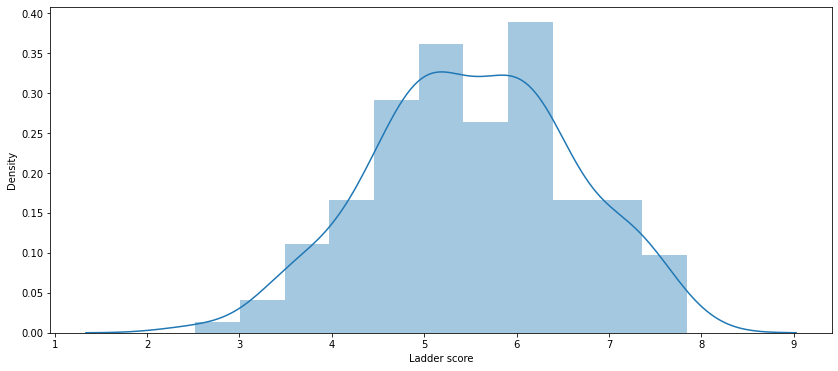

In [ ]:
sns.distplot(data['Ladder score']) # побудуємо графік щільності розподілу для результуючої змінної

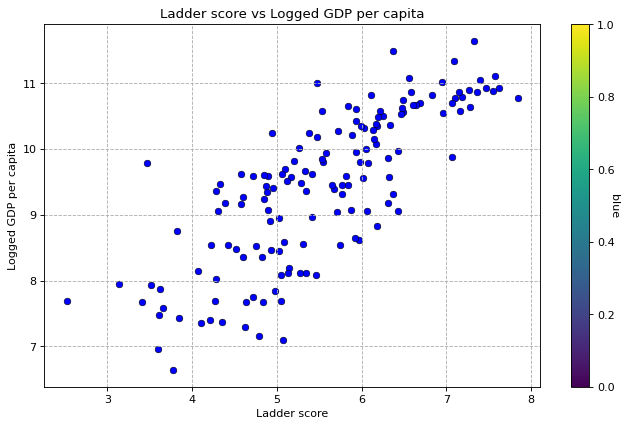

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('Ladder score', 'Logged GDP per capita', data=data, c='blue', cmap='Reds', edgecolors='black', linewidths=.5)
plt.grid(linestyle='--')
plt.xlabel('Ladder score', fontsize=10)
plt.ylabel('Logged GDP per capita', fontsize=10)
plt.title('Ladder score vs Logged GDP per capita')
cbar = plt.colorbar()
cbar.set_label('blue', rotation=270)
#plt.savefig('my_figure.png')
plt.show()

Data cleaning and dealing with missing data

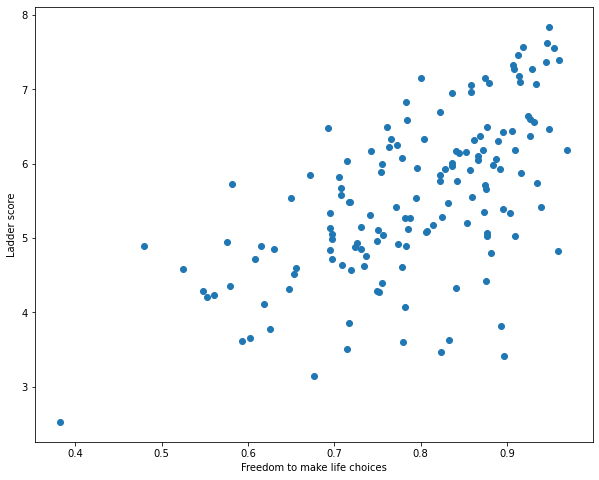

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(data['Freedom to make life choices'], data['Ladder score'])
plt.xlabel('Freedom to make life choices')
plt.ylabel('Ladder score')
plt.show()

In [ ]:
data.drop(data[(data['Freedom to make life choices'] < 0.5)].index, axis=0, inplace=True)

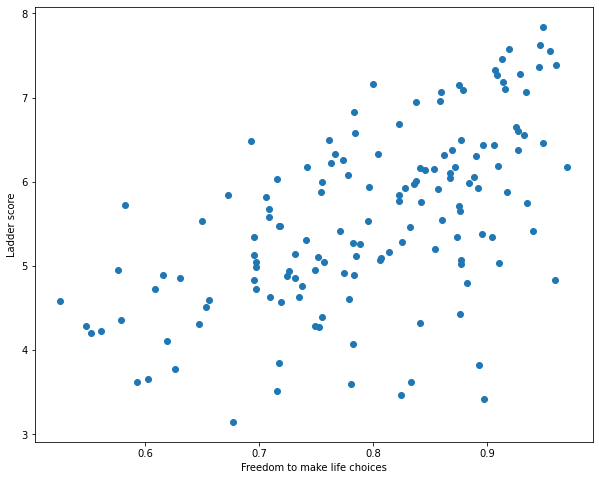

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(data['Freedom to make life choices'], data['Ladder score'])
plt.xlabel('Freedom to make life choices')
plt.ylabel('Ladder score')
plt.show()

In [ ]:
# separate categorical and numerical features

categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
categorical_features

Index(['Country name', 'Regional indicator'], dtype='object')

In [ ]:
numerical_features

Index(['Ladder score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
print("Number of numerical features : " + str(len(numerical_features)))
print("Number of categorical features : " + str(len(categorical_features)))

Number of numerical features : 7
Number of categorical features : 2


In [ ]:
# missing numerical values is replaced by median

data_num = data[numerical_features].fillna(data[numerical_features].median())

In [ ]:
# missing categorical values is replaced by mode

data_cat = data[categorical_features].fillna(data[categorical_features].mode())

Data transformation and categorical features encoding

In [ ]:
# skewness

from scipy.stats import skew
skewness = data_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

Generosity                      0.98
Ladder score                   -0.02
Logged GDP per capita          -0.36
Freedom to make life choices   -0.50
Healthy life expectancy        -0.52
Social support                 -0.87
Perceptions of corruption      -1.55
dtype: float64

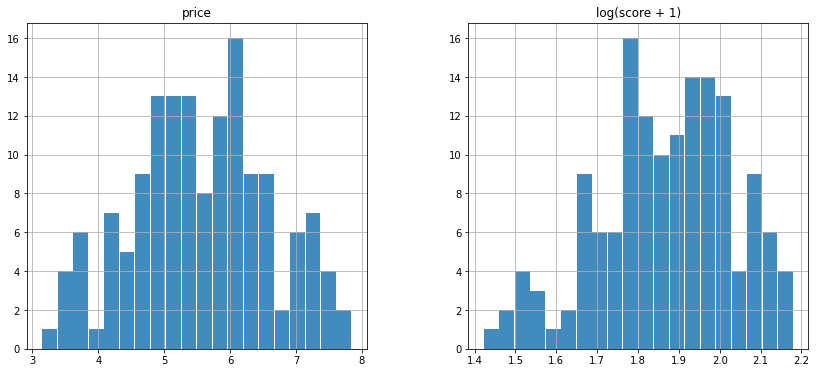

In [ ]:
plt.rcParams['figure.figsize'] = (14.0, 6.0)
prices = pd.DataFrame({"price": data["Ladder score"], "log(score + 1)":np.log1p(data["Ladder score"])})
prices.hist(bins=20, alpha=0.85, rwidth=0.95)
plt.show()

In [ ]:
skewed_cols = skewness[abs(skewness)>1].index
skewed_cols

Index(['Perceptions of corruption'], dtype='object')

In [ ]:
data_num[skewed_cols] = np.log1p(data_num[skewed_cols])

In [ ]:
# dummy variables

data_cat = pd.get_dummies(data_cat)
data_cat.shape

(147, 157)

In [ ]:
data_cat.head()

,Country name_Albania,Country name_Argentina,Country name_Armenia,Country name_Australia,Country name_Austria,Country name_Azerbaijan,Country name_Bahrain,Country name_Bangladesh,Country name_Belarus,Country name_Belgium,...,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = pd.concat([data_cat, data_num], axis=1)
y = X["Ladder score"]
X.drop(['Ladder score'], axis=1, inplace=True)

In [ ]:
X.shape

(147, 163)

In [ ]:
y.shape

(147,)

In [ ]:
X.isnull().sum().sum()

0

В процесі даної роботи була виконана візуалізація даних та їх препроцесинг (за допомогою One-hot encoding). Після препроцесингу, дані стають більш зручними для роботи та на їх основі можна будувати більш точні моделі та прогнози.